In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

C:\Users\User\miniconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv('Alignment-HitTable.csv', header = None)
df.columns = ['query acc.verr', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 
             'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score']
#df.head()
results = df.describe()
corr = df.corr()

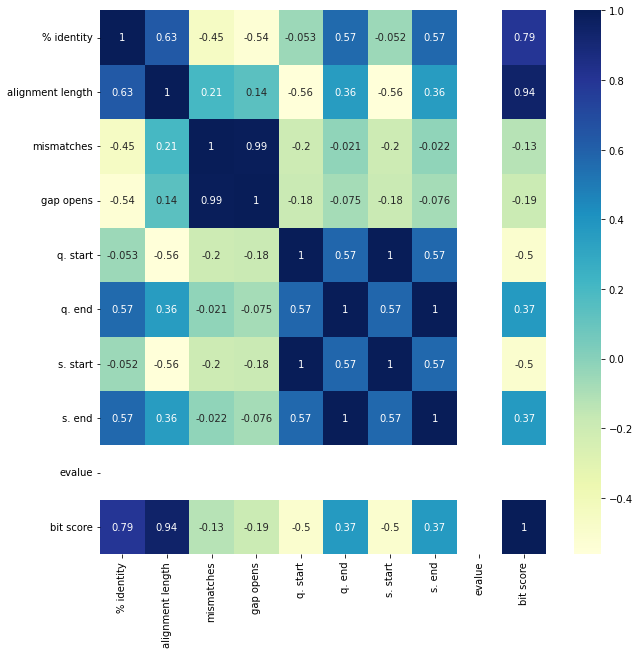

In [3]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.show()

In [4]:
##  PCA with 2 components on the numeric columns of the datafame

df_numeric = df.select_dtypes(include=['float64', 'int64'])
pca = PCA(n_components=2)
pca.fit(df_numeric)

# Access the principal components and explained variance ratio
principal_components = pca.transform(df_numeric)
explained_variance_ratio = pca.explained_variance_ratio_


In [5]:
components = pd.DataFrame(pca.components_, index=['Component 1', 'Component 2'], columns=df_numeric.columns)

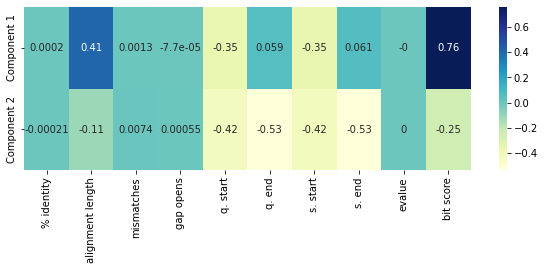

In [6]:
#generate heatmap with components
fig, ax = plt.subplots(figsize = (10,3))
sns.heatmap(components, annot = True, cmap = 'YlGnBu')
plt.show()

<Axes: >

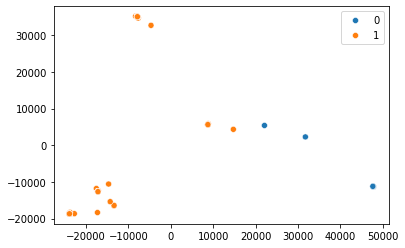

In [7]:
kmeans = KMeans(n_clusters=2, random_state=0)
y_pred = kmeans.fit_predict(df_numeric)
sns.scatterplot(x= pca.transform(df_numeric)[:, 0], y = pca.transform(df_numeric)[:, 1], hue = y_pred)